<a href="https://colab.research.google.com/github/Matheus-Santos-AI/curso1tiaor-pbl-fase2-CAP1-FarmTechFIAP/blob/main/Modelos_de_treinamento_de_classifica%C3%A7%C3%A3o_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Carregar o dataset
df = pd.read_csv("fertilizer_prediction.csv")
# Exibir as primeiras linhas do DataFrame
df.head()

,Temperature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [3]:
# Mostra informações gerais sobre a base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temperature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


Número de dados duplicados: 0


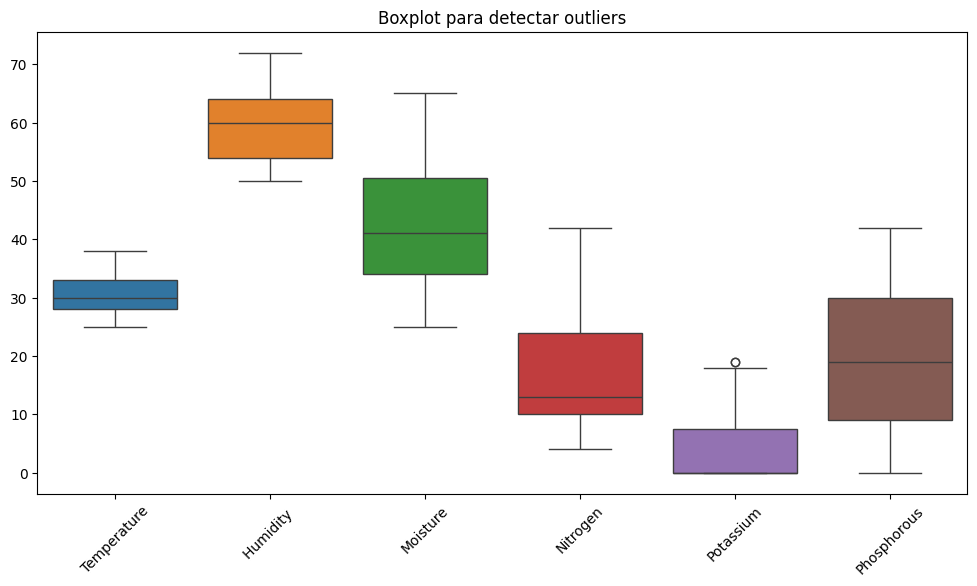

In [4]:
# Imprime informações relevantes à limpeza
# Verificar a presença de dados duplicados
duplicates = df.duplicated().sum()
print("Número de dados duplicados:", duplicates)
# Verificar a presença de outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot para detectar outliers")
plt.xticks(rotation=45)
plt.show()

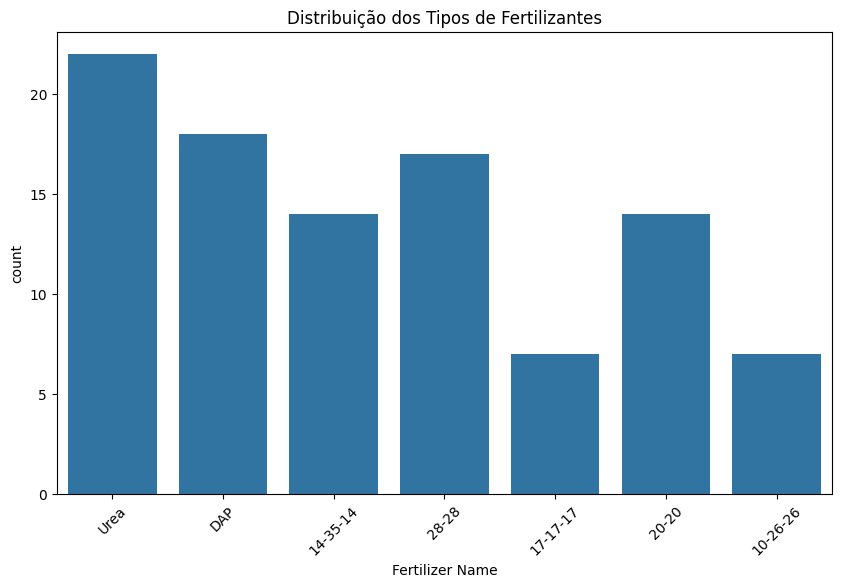

In [5]:
# Exploração da distribuição dos labels
plt.figure(figsize=(10, 6))
sns.countplot(x='Fertilizer Name', data=df)
plt.title("Distribuição dos Tipos de Fertilizantes")
plt.xticks(rotation=45)
plt.show()

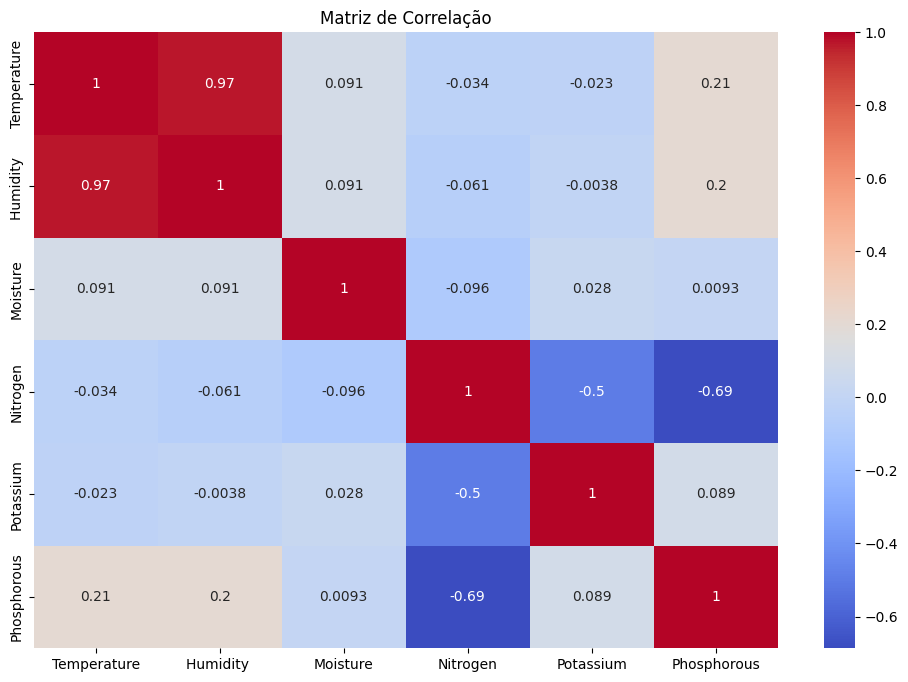

In [6]:
# Correlação entre as features numéricas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=numerics).corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

In [7]:
# Remover dados duplicados, se houver
df = df.drop_duplicates()
# Tratar outliers, se necessário (substituir por média, mediana, etc.)
# Exemplo: substituir outliers da coluna 'Temperature' pela mediana
median_temperature = df['Temperature'].median()
df['Temperature'] = df['Temperature'].apply(lambda x: median_temperature if x > df['Temperature'].quantile(0.975) or x < df['Temperature'].quantile(0.025) else x)
df.shape
#nesse caso não existe outliers para serem tratados e esses codigos não fazem nada

(99, 9)

In [9]:
# Separando features e labels
X = df.drop('Fertilizer Name', axis=1)
y = df['Fertilizer Name']
# Label Encoder para a variável alvo (transforma as strings em numeros)
le = LabelEncoder()
y = le.fit_transform(y)
# Lista de colunas categóricas e aplicação de One-Hot Encoding (adiciona colunas com numeração binaria para representar os dados)
categorical_cols = ['Soil Type', 'Crop Type']
ohe = OneHotEncoder(handle_unknown='ignore')
X_encoded = pd.DataFrame(ohe.fit_transform(X[categorical_cols]).toarray())
X_encoded = X_encoded.add_prefix('OHE_')
# Removendo colunas categóricas originais
X = X.drop(categorical_cols, axis=1)
# Concatenando as features codificadas com as numéricas
X = pd.concat([X, X_encoded], axis=1)
# Dividindo os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Normalização das features numéricas
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_teste_scaled = scaler.transform(X_test)

In [10]:
# Regressão Logística
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_teste_scaled)
print("Acurácia Regressão Logística:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
# KNN
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_teste_scaled)
print("Acurácia KNN:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Acurácia Regressão Logística: 0.7
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.60      0.60      0.60         5
           5       0.57      0.80      0.67         5
           6       1.00      1.00      1.00         6

    accuracy                           0.70        20
   macro avg       0.53      0.48      0.49        20
weighted avg       0.69      0.70      0.68        20

Acurácia KNN: 0.3
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.33      0.20      0.25         5
           5       0.33      0.20      0.25         5
           6       0.80      0.67      0.73         6

    accuracy             

In [11]:
# SVM com kernel RBF -> mais complexo
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_scaled, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_teste_scaled)
print("Acurácia SVM (RBF):", accuracy_score(y_test, y_pred_svm_rbf))
print(classification_report(y_test, y_pred_svm_rbf))
# SVM com kernel polinomial -> intermediário
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train_scaled, y_train)
y_pred_svm_poly = svm_poly.predict(X_teste_scaled)
print("Acurácia SVM (Polinomial):", accuracy_score(y_test, y_pred_svm_poly))
print(classification_report(y_test, y_pred_svm_poly))
# SVM com kernel linear -> o mais simples
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)
y_pred_svm_linear = svm_linear.predict(X_teste_scaled)
print("Acurácia SVM (Linear):", accuracy_score(y_test, y_pred_svm_linear))
print(classification_report(y_test, y_pred_svm_linear))

Acurácia SVM (RBF): 0.35
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.43      0.60      0.50         5
           5       0.00      0.00      0.00         5
           6       1.00      0.50      0.67         6

    accuracy                           0.35        20
   macro avg       0.40      0.27      0.31        20
weighted avg       0.51      0.35      0.39        20

Acurácia SVM (Polinomial): 0.45
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.43      0.60      0.50         5
           5       0.60      0.60      0.60         5
           6       1.

In [12]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_teste_scaled)
print("Acurácia Decision Tree:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
# Random Forest
rf = RandomForestClassifier(n_estimators=25)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_teste_scaled)
print("Acurácia Random Forest:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Acurácia Decision Tree: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Acurácia Random Forest: 0.95
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.